# Regresjonsmodeller

Regresjon er en form for modellering som brukes i mange ulike fagdisipliner, fra samfunnsvitenskap og økonomi til naturvitenskap og matematikk. Det betyr å finne en funksjon som er best tilpasset datasettet vårt. Regresjon tar ofte utgangspunkt i _minste kvadraters metode_, som gjør at vi får en modellfunksjon som gir minst mulig varians. Regresjonsmodeller passer derfor ofte ikke perfekt med alle, eller noen, av punktene. Modellene har heller et avvik fra gjennomsnittet av punktene (varians) som er så lite som mulig.

## Lineær regresjon

Vi har tidligere sett på enkel [polynomregresjon](https://andreasdh.github.io/NAT3000/docs/tema3_datahandtering/statistikk.html#regresjon) med funksjonen _polyfit_ fra numpy-biblioteket. Denne kan brukes dersom vi for eksempel ønsker å utføre lineær regresjon eller andregradsregresjon. Men hvis vi ønsker å tilpasse dataene våre til en vilkårlig modell, må vi bruke en annen funksjon. Funksjonen _curve\_fit_ fra scipy-biblioteket har den funksjonaliteten vi ønsker. Da definerer vi en bestemt modell, i form av en Python-funksjon, som er utgangspunktet for regresjonen vår. Modellfunksjonen må ta som parameter en uavhengig variabel, i tillegg til koeffisientene/konstantene i uttrykket. Hvis vi for eksempel ønsker å gjøre en lineær regresjon, kan vi definere følgende funksjon:

In [1]:
def modell(x, a, b):
    return a*x + b

Her ser vi at variabelen _x_ og konstantene _a_ og _b_ er gitt som parametre i funksjonen. La oss lage en lineær modell ut fra følgende data, som et eksempel:

In [2]:
x = [1, 2, 3, 4, 5]
y = [2.1, 3.9, 6.5, 7.1, 11.0]

Først importerer vi funksjonen fra underbiblioteket _optimize_, som finnes i scipy-biblioteket. Deretter bruker vi funksjonen til å lage en lineær modell som passer best mulig med dataene våre. Funksjonen _curve_\fit_ gir både koeffisientene _a_ og _b_, men også et mål på hvor godt modellen passer dataene våre som kalles _kovarians_. Dette skal vi ikke se på her, men vi må passe på å lagre koeffisientene og kovariansen i ulike variabler, slik at vi får ut riktige verdier for modellen vår. Parametrene i _curve\_fit_ er modellfunksjonen vår og dataene vi vil beskrive med modellen vår (her _x_ og _y_): 

In [3]:
from scipy.optimize import curve_fit

koeffisienter, kovarians = curve_fit(modell, x, y)
print("Koeffisienter:", koeffisienter)
print("Kovarians:", kovarians)

Koeffisienter: [ 2.1  -0.18]
Kovarians: [[ 0.06359996 -0.19079989]
 [-0.19079989  0.69959972]]


Vi overser her de fire verdiene som utgjør kovariansen vår, og ser at vi har fått koeffisientene $a = 2,1$ og $b = -0,18$. Dette betyr at regresjonsmodellen har formen $y = 2,1x - 0,18$. Koeffisientene kommer i den rekkefølgen vi har gitt i modellfunksjonen vår. La oss derfor legge dem i hver sin variabel: 

In [4]:
a = koeffisienter[0]
b = koeffisienter[1]

Nå kan vi for eksempel plotte datapunktene og modellfunksjonen i samme koordinatsystem. Da genererer vi noen nye _x_-verdier som vi kan lage funksjonsverdier ut fra, og deretter bruker vi modellfunksjonen til å generere _y_-verdier:

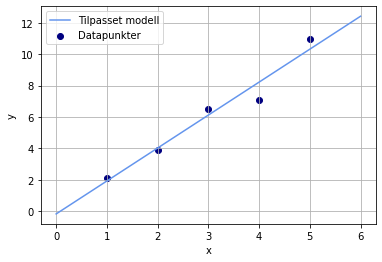

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x_ny = np.linspace(0, 6, 1000)
y_modell = modell(x_ny, a, b)

plt.plot(x_ny, y_modell, color = "cornflowerblue", label = "Tilpasset modell")
plt.scatter(x, y, color = "navy", label = "Datapunkter")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

En måte å måle hvor godt modellen er tilpasset dataene våre, er å regne ut $R^2$. Da mater vi inn de originale _x_-verdiene i modellen vår, og sammenlikner dem med de originale _y_-verdiene:

In [6]:
from sklearn.metrics import r2_score

x = np.array(x)
y_predikert = modell(x,a,b)

R2 = r2_score(y, y_predikert)
print("R2 =", R2)

R2 = 0.9585289514866979


En $R^2$-score varierer mellom 0 og 1, der 1 er perfekt tilpasning til modellen, og 0 er ingen tilpasning. Desto høyere verdi $R^2$ har, desto bedre forklarer modellen de allerede eksisterende dataene (men ikke nødvendigvis data i framtiden!).

## Andre regresjonsmodeller

Hvis vi ønsker å bruke andre regresjonsmodeller, er det bare å endre modellfunksjonen vår. Dersom vi for eksempel ønsker å gjøre en logistisk regresjon av dataene våre ovenfor, kan vi definere en generell logistisk funksjon:

$$f(x) = \frac{c}{1 + a\cdot e^{-bx}}$$

Dette kan vi gjøre enkelt i Python, og vi kan gjenta den samme prosedyren med tilpasning og plotting som med lineær regresjon. Et fullstendig program vil kunne se slik ut:

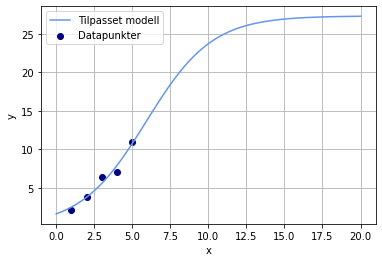

In [18]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 3, 4, 5]
y = [2.1, 3.9, 6.5, 7.1, 11.0]

def modell_logistisk(x, a, b, c):
    return c/(1 + a*np.exp(-b*x))

koeffisienter, kovarians = curve_fit(modell_logistisk, x, y)

a = koeffisienter[0]
b = koeffisienter[1]
c = koeffisienter[2]

x_ny = np.linspace(0, 20, 1000)
y_modell = modell_logistisk(x_ny, a, b, c)

plt.plot(x_ny, y_modell, color = "cornflowerblue", label = "Tilpasset modell")
plt.scatter(x, y, color = "navy", label = "Datapunkter")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

```{admonition} Oppgave
:class: tip
1. Forklar hvordan programmet ovenfor fungerer.
2. Lag en modell som beskriver dataene som beskriver [antall smittede som funksjon av tid](https://raw.githubusercontent.com/andreasdh/NAT3000/master/docs/datafiler/smitte_virus.csv).
3. Tolk modellen og beskriv hva den kan fortelle oss.
4. Regn ut $R^2$ for modellen og forklar hva dette sier oss.
```